Following is the eda of entities,categories,topics,advertisers,campaigns and publishers

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc # We're gonna be clearing memory a lot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
p = sns.color_palette()

In [2]:
input_path = 'C:/Users/SupriyaR/Documents/project_notebook/input'
df_document_categories =  pd.read_csv(input_path+'/documents_categories.csv')

In [3]:
df_promoted_content =  pd.read_csv(input_path+'/promoted_content.csv')

In [4]:
df_doc_metadata =  pd.read_csv(input_path+'/documents_meta.csv')

In [5]:
df_doc_topics =  pd.read_csv(input_path+'/documents_topics.csv')

In [6]:
df_doc_topics.head()

,document_id,topic_id,confidence_level
0,1595802,140,0.073113
1,1595802,16,0.059416
2,1595802,143,0.045421
3,1595802,170,0.038867
4,1524246,113,0.196450


In [7]:
df_doc_entities = pd.read_csv(input_path+'/documents_entities.csv')

In [8]:
df_doc_entities.head()

,document_id,entity_id,confidence_level
0,1524246,f9eec25663db4cd83183f5c805186f16,0.672865
1,1524246,55ebcfbdaff1d6f60b3907151f38527a,0.399114
2,1524246,839907a972930b17b125eb0247898412,0.392096
3,1524246,04d8f9a1ad48f126d5806a9236872604,0.213996
4,1617787,612a1d17685a498aff4f036c1ee02c16,0.386193


In [9]:
len(df_document_categories.category_id.unique())

97

In [10]:
category_count = df_document_categories.groupby('category_id')['confidence_level'].count().sort_values()

In [11]:
len(df_doc_topics.topic_id.unique())

300

In [12]:
topics_count = df_doc_topics.groupby('topic_id')['confidence_level'].count().sort_values()

In [13]:
categories_performance = []
for i in [1000, 10000, 50000, 100000]:
    print('Categories that appear less than {} times: {}%'.format(i, round((category_count <= i).mean() * 100, 2)))
    categories_performance.append(round((category_count <= i).mean() * 100, 2))

Categories that appear less than 1000 times: 9.28%
Categories that appear less than 10000 times: 32.99%
Categories that appear less than 50000 times: 63.92%
Categories that appear less than 100000 times: 84.54%


In [14]:
topics_performance = []
for i in [5000, 10000, 50000, 100000]:
    print('topics that appear less than {} times: {}%'.format(i, round((topics_count <= i).mean() * 100, 2)))
    topics_performance.append(round((topics_count <= i).mean() * 100, 2))

topics that appear less than 5000 times: 15.67%
topics that appear less than 10000 times: 33.0%
topics that appear less than 50000 times: 71.33%
topics that appear less than 100000 times: 92.67%


In [15]:
topics_performance

[15.67, 33.0, 71.33, 92.67]

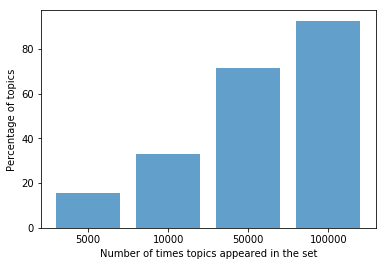

<Figure size 432x288 with 0 Axes>

In [16]:
objects_1 =('5000', '10000', '50000','100000')
y_pos = np.arange(len(objects_1)) 
plt.bar(y_pos, topics_performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects_1)
plt.ylabel('Percentage of topics')
plt.xlabel('Number of times topics appeared in the set')
plt.show()
plt.savefig('topics.png')



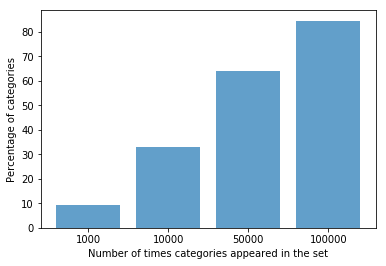

<Figure size 432x288 with 0 Axes>

In [17]:
objects_2 =('1000', '10000', '50000','100000')
plt.bar(y_pos, categories_performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects_2)
plt.ylabel('Percentage of categories')
plt.xlabel('Number of times categories appeared in the set')
plt.show()
plt.savefig('categories.png')

In [18]:
len(df_doc_entities.entity_id.unique())

1326009

In [19]:
entities_count = df_doc_entities.groupby('entity_id')['confidence_level'].count().sort_values()
entities_performance = []
for i in [1,2,5,10]:
    print('Entities that appear less than {} times: {}%'.format(i, round((entities_count <= i).mean() * 100, 2)))
    entities_performance.append(round((entities_count <= i).mean() * 100, 2))

Entities that appear less than 1 times: 72.78%
Entities that appear less than 2 times: 84.69%
Entities that appear less than 5 times: 93.23%
Entities that appear less than 10 times: 96.41%


In [20]:
entities_performance

[72.78, 84.69, 93.23, 96.41]

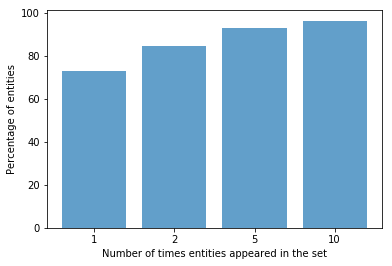

In [21]:
objects =('1','2','5','10')
y_pos = np.arange(len(objects)) 
plt.bar(y_pos, entities_performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage of entities')
plt.xlabel('Number of times entities appeared in the set')
plt.savefig('entities.png')
plt.show()


In [22]:
len(df_promoted_content.campaign_id.unique())

34675

In [23]:
camp_count = df_promoted_content.groupby('campaign_id')['campaign_id'].count().sort_values()

In [24]:
camp_performance = []
for i in [1,5,10,50]:
    print('Campaigns that appear less than {} times: {}%'.format(i, round((camp_count <= i).mean() * 100, 2)))
    camp_performance.append(round((camp_count <= i).mean() * 100, 2))

Campaigns that appear less than 1 times: 18.99%
Campaigns that appear less than 5 times: 53.8%
Campaigns that appear less than 10 times: 71.68%
Campaigns that appear less than 50 times: 94.47%


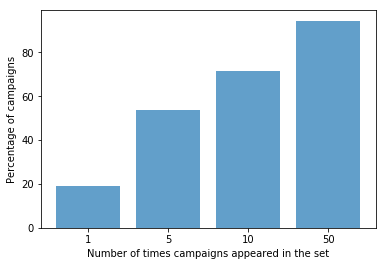

In [25]:
objects =('1','5','10','50')
y_pos = np.arange(len(objects)) 
plt.bar(y_pos, camp_performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage of campaigns')
plt.xlabel('Number of times campaigns appeared in the set')
plt.savefig('campaigns.png')
plt.show()


In [26]:
len(df_promoted_content.advertiser_id.unique())
# events_pc.head()

4385

In [27]:
advertiser_count = df_promoted_content.groupby('advertiser_id')['advertiser_id'].count().sort_values()

In [28]:
advertiser_performance = []
for i in [1,5,10,50]:
    print('advertisers that appear less than {} times: {}%'.format(i, round((advertiser_count <= i).mean() * 100, 2)))
    advertiser_performance.append(round((advertiser_count <= i).mean() * 100, 2))

advertisers that appear less than 1 times: 16.05%
advertisers that appear less than 5 times: 42.87%
advertisers that appear less than 10 times: 54.87%
advertisers that appear less than 50 times: 79.2%


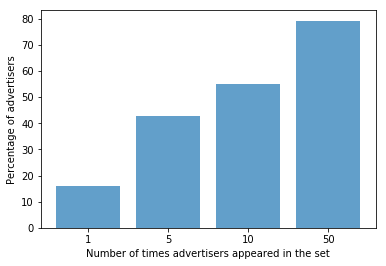

In [29]:
objects =('1','5','10','50')
y_pos = np.arange(len(objects)) 
plt.bar(y_pos, advertiser_performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage of advertisers')
plt.xlabel('Number of times advertisers appeared in the set')
plt.savefig('advertisers.png')
plt.show()


In [30]:
len(df_doc_metadata.publisher_id.unique())

1260

In [31]:
publisher_count = df_doc_metadata.groupby('publisher_id')['publisher_id'].count().sort_values()

In [32]:
publisher_performance = []
for i in [50,100,500,1500,6000]:
    print('Publishers that appear less than {} times: {}%'.format(i, round((publisher_count <= i).mean() * 100, 2)))
    publisher_performance.append(round((publisher_count <= i).mean() * 100, 2))

Publishers that appear less than 50 times: 45.35%
Publishers that appear less than 100 times: 50.52%
Publishers that appear less than 500 times: 65.45%
Publishers that appear less than 1500 times: 78.47%
Publishers that appear less than 6000 times: 92.37%


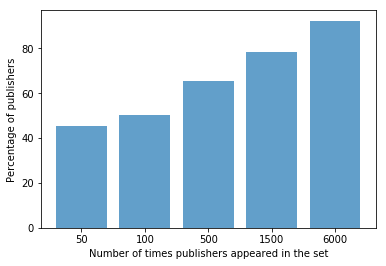

In [33]:
objects =('50','100','500','1500','6000')
y_pos = np.arange(len(objects)) 
plt.bar(y_pos, publisher_performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage of publishers')
plt.xlabel('Number of times publishers appeared in the set')
plt.savefig('publishers.png')
plt.show()
